<p><h1><font color = DarkBlue> Healthcare Case Study</font></h1></p>

D2Hawkeye, a medical data mining company. The company receives claims data. These are data that are generated when an insured patient goes to a medical provider to receive a diagnosis or to have a procedure, for example an x-ray, or to obtain drugs. The medical providers need to get compensated, so the claims data provide the means for them to be paid. An important question is whether we can assess the quality of health care given this claims data. 

<b> Why assessing the quality of healthcare is an important objective. </b>

Critical decisions are often made by people with expert knowledge
<p><h4><font color = Purple> Healthcare Quality Assessment </font></h4></p>
<ul> 
<li>Good quality care educates patients and controls costs</li>
<li>Need to assess quality for proper medical interventions </li>
<li>No single set of guidelines for defining quality of healthcare </li>
<li>Health protessionals are experts in quality of care assessment </li>
</ul>

<b> Experts are Humans </b>
<p><h4><font color = Purple> Healthcare Quality Assessment </font></h4></p>
<ul> 
<li>Expert physicians can evaluate quality by examining a patient’s records</li>
<li>This process is time consuming and inefficient </li>
<li>Physicians cannot assess quality tor millions of patients </li>
</ul>

<b> Can we develop analytical tools that replicate expert assessment on a large scale? </b>

Learn from expert human judgment
- Develop a model, interpret results, and adjust the model
Make predictions/evaluations on a large scale

<p><h4><font color = Purple>Healthcare Quality Assessment  </font></h4></p>
<ul><li> Let’s identity poor healthcare quality using analytics</li></ul>

<p><h4><font color = Purple>Building the dataset </font></h4></p>

<ul><li><b> Claims Data </b></li>
<ul> <li> Electronically available </li>
<li>Standardized </li>
<li>Not 100% accurate </li>
<li>Under-reporting is common </li>
<li>Claims for hospital visits can be vague </li> </ul></ul>
    
<ul><li><b> Creating the Dataset- Claims Sample </b> </li>
<ul> <li> Large health insurance claims database </li>
<li>Randomly selected 131 diabetes patients</li>
<li>Ages range from 35 to 55 </li>
<li>Costs \$10,000 - \$20,000 </li>
    <li>September 1, 2003 — August 31, 2005 </li> </ul></ul>
    
<ul><li><b> Creating the Dataset- Expert Review </b></li>
    <ul> <li> Expert physician reviewed claims and wrote descriptive notes: </li> 
    <ul><li>“Ongoing use of narcotics”</li>
    <li>“Only on Avandia, not a good first choice drug” </li>
    <li>“Had regular visits, mammogram and immunizations”</li>
    <li>“Was given hometesting supplies”</li> </ul></ul></ul>    
    
<ul><li><b> Creating the Dataset- Expert Assessment </b></li>
    <ul> <li> Rated quality on a two-point scale (poor/good) </li> 
    <ul><li>“I'd say care was poor — poorly treated diabetes”</li>
    <li>“No eye care, but overall I'd say high quality” </li></ul></ul></ul>   

<p><h2><font color = Blue>Importing the Required Libraries </font></h2></p>

In [1]:
# Logistic regression using scikit-Learn 
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import accuracy_score, auc, confusion_matrix, precision_score, recall_score, roc_curve,classification_report
import matplotlib.pyplot as plt
import seaborn as sns

<p><h2><font color = Blue>Reading the Dataset </font></h2></p>

In [2]:
# Read the Dataset
quality = pd.read_csv("https://storage.googleapis.com/dimensionless/Analytics/quality.csv")

In [3]:
quality.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall,PoorCare
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1,0
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5,0
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0,0


<p><h2><font color = DarkBlue> Data Set Description </font></h2></p>

The variables in the dataset quality.csv are as follows: 
<ul>
    <li><b>MemberID: </b> numbers the patients from 1 to 131, and is just an identifying number. </li>
<li><b>InpatientDays: </b> is the number of inpatient visits, or number of days the person spent in the hospital. </li>
<li><b>ERVisits: </b> is the number of times the patient visited the emergency room. </li>
<li><b>OfficeVisits: </b> is the number of times the patient visited any doctor's office. </li>
<li><b>Narcotics: </b>is the number of prescriptions the patient had for narcotics. </li>
<li><b>DaysSinceLastERVisit: </b> is the number of days between the patient's last emergency room visit and the end of the study period (set to the length of the study period if they never visited the ER). </li>
<li><b>Pain: </b> is the number of visits for which the patient complained about pain. </li>
<li><b>TotalVisits: </b> is the total number of times the patient visited any healthcare provider. </li>
<li><b>ProviderCount: </b> is the number of providers that served the patient. </li>
<li><b>MedicalClaims: </b> is the number of days on which the patient had a medical claim. </li>
<li><b>ClaimLines:</b> is the total number of medical claims. </li>
<li><b>StartedOnCombination: </b> is whether or not the patient was started on a combination of drugs to treat their diabetes (TRUE or FALSE). </li>
<li><b>AcuteDrugGapSmall: </b> is the fraction of acute drugs that were refilled quickly after the prescription ran out. </li>
<li><b>PoorCare: </b> is the outcome or dependent variable, and is equal to 1 if the patient had poor care, and equal to 0 if the patient had good care. </li>

<font color = purple><b> The dependent variable is modeled as a binary variable: </font></b>

<ul><li> 1 if low-quality care, 0 if high-quality care </li></ul>

In [4]:
quality.describe()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,AcuteDrugGapSmall,PoorCare
count,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000,131.000000
mean,66.000000,2.717557,1.496183,13.229008,4.572519,480.567112,15.557252,17.442748,23.984733,43.244275,142.862595,2.694656,0.251908
std,37.960506,5.099434,2.167501,9.077076,9.713615,274.767240,20.418001,12.298318,13.670285,28.886540,91.629921,6.983379,0.435775
min,1.000000,0.000000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,5.000000,11.000000,20.000000,0.000000,0.000000
25%,33.500000,0.000000,0.000000,7.000000,0.000000,206.958333,1.000000,8.000000,15.000000,25.500000,83.500000,0.000000,0.000000
50%,66.000000,0.000000,1.000000,12.000000,1.000000,640.958333,8.000000,15.000000,20.000000,37.000000,120.000000,1.000000,0.000000
75%,98.500000,3.000000,2.000000,18.500000,3.000000,731.000000,23.000000,22.500000,30.000000,49.500000,185.000000,3.000000,0.500000
max,131.000000,30.000000,11.000000,46.000000,59.000000,731.000000,104.000000,69.000000,82.000000,194.000000,577.000000,71.000000,1.000000


<p><h3><font color = Purple> Quiz 1: Create a baseline model.

Find out how many patients received poor care and how many patients received good care. </font></h3></p>


In [5]:
quality.PoorCare.value_counts()

0    98
1    33
Name: PoorCare, dtype: int64

<p><h4><font color = Purple>Since good care is more common than poor care, we would predict that all patients are receiving good care. <br><br>
    We would get 98 out of the 131 observations correct, or have an accuracy of about 75%. </font></h4></p>

<p><h2><font color = Blue>Creating Feature matrix and Target array </font></h2></p>

In [6]:
X = quality.iloc[:,0:13]

In [7]:
X.head()

,MemberID,InpatientDays,ERVisits,OfficeVisits,Narcotics,DaysSinceLastERVisit,Pain,TotalVisits,ProviderCount,MedicalClaims,ClaimLines,StartedOnCombination,AcuteDrugGapSmall
0,1,0,0,18,1,731.0,10,18,21,93,222,False,0
1,2,1,1,6,1,411.0,0,8,27,19,115,False,1
2,3,0,0,5,3,731.0,10,5,16,27,148,False,5
3,4,0,1,19,0,158.0,34,20,14,59,242,False,0
4,5,8,2,19,3,449.0,10,29,24,51,204,False,0


In [8]:
y = quality['PoorCare']

In [9]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: PoorCare, dtype: int64

<p><h2><font color = Blue>Splitting data into train and test  </font></h2></p>

In [10]:
train_test_split?

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=88, stratify=y)

In [12]:
X_train.shape

(91, 13)

In [13]:
y_train.shape

(91,)

In [14]:
X_test.shape

(40, 13)

In [15]:
y_test.shape

(40,)

In [16]:
y_train.value_counts()

0    68
1    23
Name: PoorCare, dtype: int64

In [17]:
y_test.value_counts()

0    30
1    10
Name: PoorCare, dtype: int64

<p><h2><font color = Blue>Building the Model  </font></h2></p>

In [18]:
model = LogisticRegression()  # create an instance of logistic regression

In [19]:
model.fit(X_train[['Narcotics','OfficeVisits']],y_train)  # building model on PoorCare ~ Narcotics + OfficeVisits 

D:\DataScience\Anaconda\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [20]:
model.score(X_train[['Narcotics','OfficeVisits']],y_train)   # Accuracy score for train

0.8241758241758241

Text(0.5, 1.0, 'Model 1 Visualization')

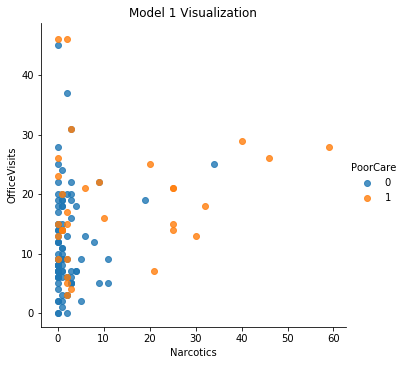

In [21]:
sns.lmplot("Narcotics","OfficeVisits",quality, fit_reg=False,hue="PoorCare",height=5, legend=True)
plt.title("Model 1 Visualization")

<p><h2><font color = Blue>Predictions on Train  </font></h2></p>

In [22]:
y_pred_train =model.predict(X_train[['Narcotics','OfficeVisits']])
y_pred_train

array([0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0], dtype=int64)

<img src = https://dim-mlp-images.s3.amazonaws.com/Chapter4/ConfusionMatrix.png>
TN:- Actually good care and for which we predict good care. <br>
TP:- Actually Poor care and for which we predict poor care. <br>
FP :- Predict poor care, but they're actually good care. <br>
FN:- Predict good care, but they're actually poor care . <br>

In [23]:
confusion_matrix(y_train, y_pred_train)    # create a confusion matrix 

array([[66,  2],
       [14,  9]], dtype=int64)

In [24]:
acc_score = (66+9)/91
acc_score

0.8241758241758241

In [25]:
accuracy_score(y_train, y_pred_train)    # calculates the accuracy score

0.8241758241758241

In [26]:
sensitivity = (9/(9+14))
sensitivity

0.391304347826087

In [27]:
specificity = (66/(66+2))
specificity

0.9705882352941176

In [28]:
precision_score(y_train, y_pred_train)

0.8181818181818182

In [29]:
recall_score(y_train, y_pred_train)

0.391304347826087

In [30]:
summary =classification_report(y_train, y_pred_train)
print(summary)

              precision    recall  f1-score   support

           0       0.82      0.97      0.89        68
           1       0.82      0.39      0.53        23

   micro avg       0.82      0.82      0.82        91
   macro avg       0.82      0.68      0.71        91
weighted avg       0.82      0.82      0.80        91



<p><h2><font color = Blue>Thresholding  </font></h2></p>

<p><h4><font color=purple> Did this patient receive poor care or good care</font></h4><p>
    
<font color = brown> <b>We can do this using a threshold value t: </b></font>
<ul>
    <li> If P(PoorCare = 1) = t, predict poor quality </li>
    <li> If P(PoorCare = 1) &lt; t, predict good quality </li> </ul>
    
<font color = brown> <b>If t is large, predict poor care rarely (when P(y=1) is large)</b></font> </li>
    <ul><li> More errors where we say good care, but it is actually poor care </li>
        <li> Detects patients who are receiving the worst care </li></ul>
<font color = brown> <b>If t is small, predict good care rarely (when P(y=1) is small)</b></font></li>
<ul><li>More errors where we say poor care, but it is actually good care </li>
<li>Detects all patients who might be receiving poor care </li></ul>

<font color = brown> <b>With no preference between the errors, select t = 0.5</b></font>
<ul><li>Predicts the more likely outcome</li>

In [31]:
pred_train_prob = model.predict_proba(X_train[['Narcotics','OfficeVisits']])
pred_train_prob[:5]

array([[0.81612454, 0.18387546],
       [0.83341812, 0.16658188],
       [0.84784713, 0.15215287],
       [0.80878721, 0.19121279],
       [0.67558948, 0.32441052]])

<p><h3><font color = Blue> Plot Receiver Operator Characteristic (ROC) Curve </font></h3></p>

The line shows how the two outcome measures vary with different threshold values.

<ul><li>True positive rate (sensitivity) on y-axis </li> 
    <ul><li>Proportion of poor care caught </li></ul></ul>
<ul><li>False positive rate (1-specificity) on x-axis </li> 
 <ul><li>Proportion of good care labeled as poor care. </li></ul></ul>

<img src = "https://dim-mlp-images.s3.amazonaws.com/Chapter4/ROCcurve.png">

<ul>
    <li><b>The ROC curve always starts at the point (0, 0). This corresponds to a threshold value of 1. </b></li>
    <ul><li>If threshold is 1, you will not catch any poor care cases, or have a sensitivity of 0. But you will correctly label all the good care cases, meaning you have a false positive rate of 0. </li></ul>
<br>
   <li><b> The ROC curve always ends at the point (1,1) which corresponds to a threshold value of 0.</b> </li>
    <ul><li> If threshold of 0, you'll catch all of the poor care cases, or have a sensitivity of 1, but you'll label all of the good care cases as poor care cases too, meaning you have a false positive rate of 1.</li></ul>
<br>    
 <li> <b>The threshold decreases as you move from (0,0) to (1,1). </b></li>
    <ul><li> At the point (0, 0.4), you're correctly labelling about 40% of the poor care cases with a very small false positive rate. </li> 
    <li> On the other hand, at the point (0.6, 0.9), you're correctly labeling about 90% of the poor care cases, but have a false positive rate of 60%. </li>
    <li>In the middle, around (0.3, 0.8), you're correctly labeling about 80% of the poor care cases, with a 30% false positive rate.</li> </ul>

In [32]:
roc_curve?

In [33]:
fpr,tpr,t = roc_curve(y_train, pred_train_prob[:,1],pos_label=1)

In [34]:
t

array([1.99000921, 0.99000921, 0.96141774, 0.87338633, 0.74625033,
       0.73240692, 0.67751769, 0.59450976, 0.36500586, 0.27890534,
       0.25084462, 0.2375389 , 0.23537706, 0.22691265, 0.21446853,
       0.2125022 , 0.20847876, 0.20068548, 0.19687147, 0.19494377,
       0.19311244, 0.19121279, 0.18757669, 0.18749646, 0.18387546,
       0.18212458, 0.18030886, 0.1785459 , 0.17679646, 0.17509853,
       0.1750605 , 0.17333801, 0.17166637, 0.16993324, 0.16825091,
       0.16658188, 0.16496239, 0.16492613, 0.15370399, 0.14757651,
       0.1211864 ])

In [35]:
fpr

array([0.        , 0.        , 0.        , 0.01470588, 0.01470588,
       0.01470588, 0.01470588, 0.02941176, 0.02941176, 0.08823529,
       0.11764706, 0.11764706, 0.16176471, 0.20588235, 0.26470588,
       0.27941176, 0.29411765, 0.33823529, 0.33823529, 0.36764706,
       0.36764706, 0.39705882, 0.42647059, 0.45588235, 0.48529412,
       0.51470588, 0.57352941, 0.61764706, 0.69117647, 0.72058824,
       0.76470588, 0.79411765, 0.80882353, 0.83823529, 0.83823529,
       0.86764706, 0.88235294, 0.92647059, 0.97058824, 0.97058824,
       1.        ])

In [36]:
tpr

array([0.        , 0.04347826, 0.08695652, 0.08695652, 0.26086957,
       0.34782609, 0.39130435, 0.39130435, 0.43478261, 0.43478261,
       0.43478261, 0.47826087, 0.47826087, 0.47826087, 0.56521739,
       0.56521739, 0.60869565, 0.60869565, 0.65217391, 0.65217391,
       0.69565217, 0.69565217, 0.69565217, 0.69565217, 0.69565217,
       0.7826087 , 0.7826087 , 0.7826087 , 0.7826087 , 0.7826087 ,
       0.82608696, 0.82608696, 0.86956522, 0.86956522, 0.91304348,
       0.91304348, 0.91304348, 0.91304348, 0.91304348, 1.        ,
       1.        ])

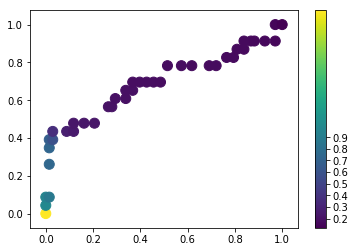

In [37]:
#plt.plot(fpr,tpr)
%matplotlib inline
#plt.figure(figsize=(5,5))
plt.scatter(fpr,tpr,c=t,s=100)
plt.colorbar(ticks=np.arange(0,1,0.1))
#plt.annotate(t,(fpr,tpr))
#ax = plt.gca()
#ax.annotate()

<p><h3><font color = Purple> Quiz 2: Selecting Threshold
    
  <img src = https://dim-mlp-images.s3.amazonaws.com/Chapter4/ROCQuiz1.png width =500 height=600>    
Which threshold would you pick if you wanted to correctly identify a small group of patients who are receiving the worst care with high confidence? </font></h3></p>
<p><h4><b><font color = purple>
1. 0.2 <br><br>
2. 0.3 <br><br>
3. 0.7 <br><br>
4. 0.8 <br><br>
    </font></b></h4></p>


<p><h3><font color = Purple> Quiz 3: Selecting Threshold
<img src = https://dim-mlp-images.s3.amazonaws.com/Chapter4/ROCQuiz1.png width =500 height=600>    
Which threshold would you pick if you wanted to correctly identify half of the patients receiving poor care, while making as few errors as possible? </font></h3></p>
<p><h4><b><font color = purple>
1. 0.2 <br><br>
2. 0.3 <br><br>
3. 0.7 <br><br>
4. 0.8 <br><br>
    </font></b></h4></p>

<p><h3><font color = Blue> Applying Threshold on predictions </font></h3></p>

In [38]:
pred_t_train = np.where(pred_train_prob[:,1]>0.3,1,0)
pred_t_train

array([0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0])

In [39]:
confusion_matrix(y_train, pred_t_train) 

array([[64,  4],
       [13, 10]], dtype=int64)

In [40]:
accuracy_score(y_train, pred_t_train)

0.8131868131868132

In [41]:
auc(fpr,tpr)    # Area under Curve for the model

0.6940537084398977

<p><h3><font color = Blue> Predictions on Test Data </font></h3></p>

In [42]:
model.score(X_test[['Narcotics','OfficeVisits']],y_test)   # Accuracy score for test

0.8

In [43]:
pred_test = model.predict(X_test[['Narcotics','OfficeVisits']])
pred_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [44]:
confusion_matrix(y_test, pred_test)

array([[30,  0],
       [ 8,  2]], dtype=int64)

In [45]:
accuracy_score(y_test,pred_test)

0.8

In [46]:
pred_test_prob = model.predict_proba(X_test[['Narcotics','OfficeVisits']])
pred_test_prob[:5,]

array([[0.78350729, 0.21649271],
       [0.8553456 , 0.1446544 ],
       [0.80692858, 0.19307142],
       [0.8214541 , 0.1785459 ],
       [0.8214541 , 0.1785459 ]])

In [47]:
pred_t= pred_test_prob[:,1]>0.3
pred_t

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True,  True, False, False, False,  True, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False,  True])

In [48]:
pred_t_test = np.where(pred_test_prob[:,1]>0.3,1,0)
pred_t_test

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1])

In [49]:
confusion_matrix(y_test, pred_t_test)

array([[27,  3],
       [ 7,  3]], dtype=int64)

In [50]:
accuracy_score(y_test, pred_t_test)

0.75